In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/water_potability_preprocessed.csv")
# df = df.iloc[:, 1:]
df = df.iloc[::100, 1:]

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
100,4.270716,166.837709,24405.250535,7.391510,297.206739,349.518910,13.478526,54.474840,3.763906,0
200,5.970036,230.449329,16324.115196,5.293919,315.186121,327.786642,13.325987,39.554249,5.428674,0
300,7.080795,225.287704,22511.692615,7.057578,377.128970,291.353701,11.590025,72.508523,4.081701,1
400,6.259652,208.379430,37356.746401,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405,1
500,6.109073,191.755571,26853.949493,9.064613,312.201984,375.547362,15.514033,73.789683,4.881101,0
600,7.080795,233.020134,27071.118618,6.220936,298.112645,357.119622,16.768945,51.284401,4.284879,0
700,7.802426,232.670280,14382.902158,7.626923,333.775777,413.292183,15.495603,42.002082,4.363530,1
800,7.296573,197.646951,22535.085158,9.288200,323.449054,353.062907,6.039669,82.536173,4.679169,1
900,7.080795,191.348259,14017.372066,6.490700,345.560481,423.978389,11.863248,65.791687,4.167336,0


In [5]:
X = df.iloc[:, :-1].values
Y = df['Potability'].values

In [6]:
columns = df.columns.values
print(', '.join(columns))
print("Кол-во признаков:", len(columns))

ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability
Кол-во признаков: 10


# Task 1

**Одномерный отбор признаков**

In [7]:
clf = SelectKBest(score_func=chi2, k=4)
clf.fit(X, Y)

SelectKBest(k=4, score_func=<function chi2 at 0x000001EB2F5C80D0>)

In [8]:
np.set_printoptions(precision=3)
print(clf.scores_)

[4.645e-03 2.269e+00 8.290e+03 1.328e-01 1.798e+00 1.557e+01 1.833e+00
 4.621e-02 2.334e-01]


In [9]:
best_features = sorted(zip(clf.scores_, columns[:-1]), reverse=True)[:clf.k]
print("Лучшие признаки:", ', '.join([elem[1] for elem in best_features]))

Лучшие признаки: Solids, Conductivity, Hardness, Organic_carbon


In [10]:
features = clf.transform(X)
print(features[0:5,:])

[[2.049e+02 2.079e+04 5.643e+02 1.038e+01]
 [1.668e+02 2.441e+04 3.495e+02 1.348e+01]
 [2.304e+02 1.632e+04 3.278e+02 1.333e+01]
 [2.253e+02 2.251e+04 2.914e+02 1.159e+01]
 [2.084e+02 3.736e+04 3.802e+02 5.568e+00]]


**Рекурсивное исключение признаков**

In [11]:
model = LogisticRegression()
rfe = RFE(model, 3)
rfe.fit(X, Y)
print("Num Features:", rfe.n_features_)
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Num Features: 3
Selected Features: [False False False  True False False  True False  True]
Feature Ranking: [2 5 7 1 3 4 1 6 1]


In [12]:
best_features = list(filter(lambda x: x[0], zip(rfe.support_, columns[:-1])))
print("Лучшие признаки:", ', '.join([elem[1] for elem in best_features]))

Лучшие признаки: Chloramines, Organic_carbon, Turbidity


In [13]:
print(rfe.score(X, Y))

0.6363636363636364


**Отбор на основе важности признаков**

In [14]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.118 0.142 0.18  0.099 0.088 0.084 0.126 0.076 0.086]


In [15]:
best_features = sorted(zip(model.feature_importances_, columns[:-1]), reverse=True)[:3]
print("3 лучших признака:", ', '.join([elem[1] for elem in best_features]))

3 лучших признака: Solids, Hardness, Organic_carbon


In [16]:
print(model.score(X, Y))

1.0


**Метод главных компонент**

In [17]:
pca = PCA(n_components=3)
pca.fit(X)
features = pca.transform(X)

In [18]:
print("Explained Variance:", pca.explained_variance_ratio_)
print(features[0:5,:])

Explained Variance: [9.998e-01 1.666e-04 2.385e-05]
[[-1.676e+03  1.586e+02 -1.484e+00]
 [ 1.938e+03 -6.228e+01 -1.239e+01]
 [-6.143e+03 -8.183e+01 -4.422e+01]
 [ 4.409e+01 -1.132e+02  2.682e+01]
 [ 1.489e+04 -4.092e+01 -4.646e+01]]


# Task 2

**KMeans**

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)
print(model.predict(X))

[0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0]


In [20]:
y_pred = model.predict(X)
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))
print(silhouette_score(X, model.labels_))

[[ 7 12]
 [12  2]]
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        19
           1       0.14      0.14      0.14        14

    accuracy                           0.27        33
   macro avg       0.26      0.26      0.26        33
weighted avg       0.27      0.27      0.27        33

0.5860149909091146


**Иерархическая кластеризация**

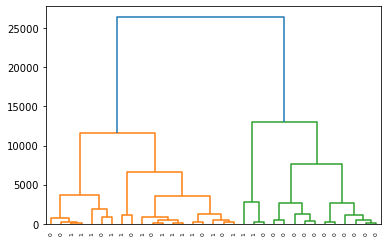

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

varieties = list(df['Potability'])
samples = df.values

mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
plt.show()

**t-SNE**

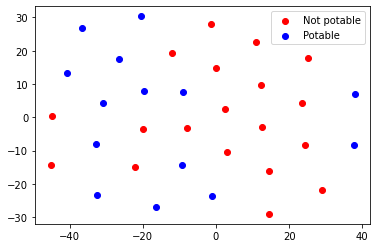

In [22]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis[Y == 0], y_axis[Y == 0], c='r', label='Not potable')
plt.scatter(x_axis[Y == 1], y_axis[Y == 1], c='b', label='Potable')
plt.legend()
plt.show()

**DBSCAN**

Counter({-1: 18, 0: 10, 1: 5})


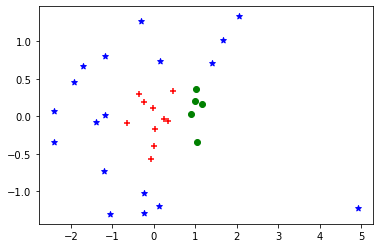

In [23]:
from sklearn.cluster import DBSCAN
import collections

dbscan = DBSCAN(eps=.5, min_samples=5)
data = X[:, [3,8]]
dbscan.fit(data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+') # Кластер 1
    elif dbscan.labels_[i] == 1:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o') # Кластер 2
    elif dbscan.labels_[i] == -1:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*') # Шум

print(collections.Counter(dbscan.labels_))

plt.show()

In [24]:
y_pred = dbscan.labels_
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))
print(silhouette_score(X, y_pred))

[[0 0 0]
 [9 6 4]
 [9 4 1]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.60      0.32      0.41        19
           1       0.20      0.07      0.11        14

    accuracy                           0.21        33
   macro avg       0.27      0.13      0.17        33
weighted avg       0.43      0.21      0.28        33

-0.11864141628094653
